In [7]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [8]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

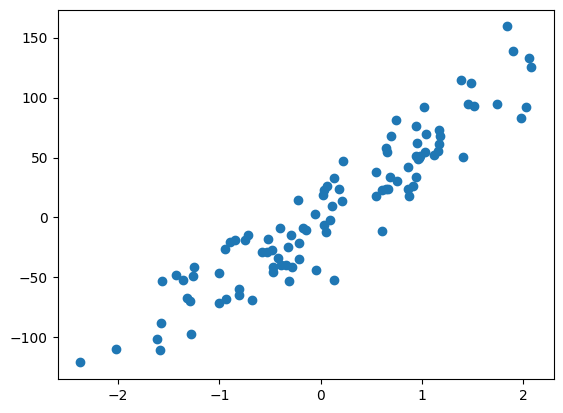

In [9]:
plt.scatter(x,y)

In [10]:
# lets' apply ols
from sklearn.linear_model import LinearRegression


In [11]:
lr = LinearRegression()


In [12]:
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

[56.00235464]
1.1756487347343958


In [ ]:
m = 56

In [30]:
class GDRegressor:

    def __init__(self,learning_rate,epochs):
        self.m = 56
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, x, y):
        # calculate the b using GD
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m * x.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
            print(loss_slope,self.b)
        print(self.b)


In [34]:
gd = GDRegressor(0.001,100)

In [35]:
gd.fit(x,y)

-24235.18978091047 -95.76481021908953
-19388.15182472838 -76.37665839436114
-15510.521459782702 -60.86613693457844
-12408.41716782616 -48.457719766752284
-9926.73373426093 -38.530986032491356
-7941.386987408744 -30.58959904508261
-6353.109589926993 -24.236489455155617
-5082.487671941595 -19.15400178321402
-4065.9901375532772 -15.088011645660742
-3252.7921100426215 -11.835219535618121
-2602.233688034097 -9.232985847584024
-2081.7869504272776 -7.151198897156746
-1665.4295603418218 -5.485769336814924
-1332.3436482734578 -4.153425688541466
-1065.874918618766 -3.0875507699227
-852.6999348950126 -2.2348508350276877
-682.1599479160101 -1.5526908871116776
-545.7279583328082 -1.0069629287788695
-436.5823666662464 -0.5703805621126231
-349.2658933329971 -0.221114668779626
-279.41271466639796 0.058298045886771954
-223.53017173311827 0.2818282176198902
-178.82413738649467 0.46065235500638485
-143.05930990919558 0.6037116649155805
-114.44744792735672 0.7181591128429372
-91.55795834188518 0.809717071